In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd

In [2]:
#import pandas as pd
df=pd.read_csv("C:/Users/USER/Desktop/513projectData.csv",header=0)
#df.head()

## Processing

In [22]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [3]:
#df.columns

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
# create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df_en = df.apply(le.fit_transform)
df_en.head()

In [26]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_en.drop('loan_status',axis=1))
scaled_features = scaler.transform(df_en.drop('loan_status',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  


,loan_amnt,term,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,...,title_Car financing,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,title_Home improvement,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_Other
0,-1.107336,-0.655995,-1.150279,-0.609240,0.264278,-1.084984,-0.351113,-1.320353,-0.802862,-0.384269,...,-0.54322,-1.021574,-0.024175,-0.121886,-0.276096,-0.175332,-0.128978,-0.083396,3.174188,-0.083621
1,-0.102670,-0.655995,0.245356,1.549619,-0.062098,1.297009,-0.351113,1.016841,0.116827,2.529258,...,-0.54322,0.978881,-0.024175,-0.121886,-0.276096,-0.175332,-0.128978,-0.083396,-0.315041,-0.083621
2,-0.487328,1.524402,-0.239616,-0.891905,2.256942,-0.574557,-0.351113,-1.176502,-0.747123,-0.717243,...,-0.54322,-1.021574,-0.024175,-0.121886,-0.276096,-0.175332,7.753241,-0.083396,-0.315041,-0.083621
3,0.889342,1.524402,0.977896,0.022832,-0.564216,-0.744699,-0.351113,-0.442975,2.191106,-0.550756,...,-0.54322,0.978881,-0.024175,-0.121886,-0.276096,-0.175332,-0.128978,-0.083396,-0.315041,-0.083621
4,-1.302196,-0.655995,-1.502858,-0.511092,-1.708858,-0.744699,-0.351113,-1.317768,-1.706626,0.614655,...,-0.54322,-1.021574,-0.024175,-0.121886,-0.276096,5.703453,-0.128978,-0.083396,-0.315041,-0.083621


In [27]:
# use the training dataset to build and validate the model, 
# and treat the test dataset as the unseen new data see if the model were in production.

from sklearn.model_selection import train_test_split

X = df_feat
y = df['loan_status']

training_features, test_features, \
training_target, test_target,  = train_test_split(X,y,test_size=0.20,random_state=45)

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(training_features, training_target,
                                                  test_size =0.2,
                                                  random_state=101)

## Oversampling

In [29]:
# oversampling only on the training data,
# so none of the information in the validation data is being used to create synthetic observations
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)


## SVM model

## Using oversampling and hpsklearn package to find best parameter( unfinished running bcz it takes too much time, and result didn't come out by the time we present)

In [45]:
from hpsklearn import HyperoptEstimator, svc

In [7]:
# Create the estimator object
estim = HyperoptEstimator( classifier=svc('mySVC') )

# Search the space of classifiers and preprocessing steps and their
# respective hyperparameters in sklearn to fit a model to the data
estim.fit( x_train_res, y_train_res )

# Make a prediction using the optimized model
prediction = estim.predict( test_features )

# Report the accuracy of the classifier on a given set of data
score = estim.score( test_data, test_label )

# Return instances of the classifier and preprocessing steps
model = estim.best_model()
print(model)

In [ ]:
from sklearn.metrics import recall_score

print('Validation Results')
print(estim.score(x_valid, y_valid))
print(recall_score(y_valid, estim.predict(x_valid)))

print('\nTest Results')
print(estim.score(test_features, test_target))
print(recall_score(test_target, estim.predict(test_features)))

## Apply oversampling and GridSearch (too much time, unfinished running)

In [ ]:
# import GridSearch (this is old output: without oversampling. However, the codes are for oversampling)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# initiate an linear SVM model
SVM =SVC()
 
parameters = {'C':[0.1,1], 'kernel':['linear']}

# GridSearch 
gs_clf = GridSearchCV(SVM, param_grid=parameters, refit = True, verbose=2)

gs_clf = gs_clf.fit(x_train_res, y_train_res)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=15.6min
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 19.9min remaining:    0.0s


[CV] ............................. C=0.1, kernel=linear, total=16.3min
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=15.8min
[CV] C=1, kernel=linear ..............................................


In [11]:
print(gs_clf.best_params_) #this is old output: without oversampling. However, the codes are for oversampling

{'C': 0.1, 'kernel': 'linear'}


In [ ]:
print('Validation Results')
print(gs_clf.score(x_valid, y_valid))
print(recall_score(y_valid, gs_clf.predict(x_valid)))
print('\nTest Results')
print(gs_clf.score(test_features, test_target))
print(recall_score(test_target, gs_clf.predict(test_features)))

In [12]:
# prediction
svm_predic = gs_clf.predict(test_features)

In [36]:
# print out result (this is old output: without oversampling. However, the codes are for oversampling)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_target,svm_predic))
print(confusion_matrix(test_target, svm_predic))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2308
           1       0.93      1.00      0.96     30052

   micro avg       0.93      0.93      0.93     32360
   macro avg       0.46      0.50      0.48     32360
weighted avg       0.86      0.93      0.89     32360

[[    0  2308]
 [    0 30052]]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM without fine-tune parameter, w/o oversampling

In [18]:
#from sklearn.model_selection import cross_validate
#from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm

# probability should set to True otherwise cannot draw ROC curve
clf_svm = svm.SVC(kernel='linear', C=1, probability=True)

## AUC Matrix Accuracy¶

In [11]:
# Import metric functions from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

              train      test
metrics                      
AUC        0.470960  0.469914
Accuracy   0.929482  0.933194
Precision  0.929482  0.933194
Recall     1.000000  1.000000
f1-score   0.963452  0.965443


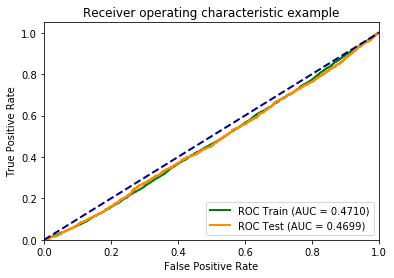

In [19]:
train_test_model(clf=clf_svm, X_train=x_train, y_train=y_train, X_test=x_valid, y_test=y_valid)

In [12]:
# Combine get_performance_metrics and plot_roc_curve functions into one function
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [13]:
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    # names of metrics
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    
    # metrics of train
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    
    # metrics of test
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    
    # combine metrics from train and test
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [14]:
# Function of plotting a roc curve
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## SVM without fine-tune parameter, but with oversampling( code didn't run completely bcz takes too much time.)

In [ ]:
clf_svm = svm.SVC(kernel='linear', C=1)
cl=clf_svm.fit(x_train_res, y_train_res)

In [ ]:
print('Validation Results')
print(cl.score(x_valid, y_valid))
print(recall_score(y_valid, gs_clf.predict(x_valid)))
print('\nTest Results')
print(cl.score(test_features, test_target))
print(recall_score(test_target, gs_clf.predict(test_features)))

In [ ]:
# print out result
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_target,svm_predic))
print(confusion_matrix(test_target, svm_predic))

## Logistic regression model with oversampling

In [31]:
# import GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#array([  1.00000000e+00,   1.00000000e+01,   1.00000000e+02,1.00000000e+03,   1.00000000e+04])
grid = {'C': np.logspace(0, 4, 10)} # (1, 10, 100, 1,000, 10,000, 100,000)

# instantiate the model 
logreg = LogisticRegression()

# GridSearch 
clf_logreg = GridSearchCV(logreg, param_grid=grid)

# fit the model with data
clf_log=clf_logreg.fit(x_train_res, y_train_res)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver

In [32]:
print(clf_log.best_params_)

{'C': 1.0}


In [33]:
from sklearn.metrics import recall_score

print('Validation Results')
print(clf_log.score(x_valid, y_valid))
print(recall_score(y_valid, clf_log.predict(x_valid)))
print('\nTest Results')
print(clf_log.score(test_features, test_target))
print(recall_score(test_target, clf_log.predict(test_features)))

Validation Results
0.6196187496378701
0.6163541537315286

Test Results
0.6216103462661661
0.6169616961696169


In [34]:
# prediction
logreg_predic=clf_log.predict(test_features)

In [35]:
# print out result
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_target,logreg_predic))
print(confusion_matrix(test_target, logreg_predic))

              precision    recall  f1-score   support

           0       0.12      0.68      0.21      1575
           1       0.96      0.62      0.75     19998

   micro avg       0.62      0.62      0.62     21573
   macro avg       0.54      0.65      0.48     21573
weighted avg       0.90      0.62      0.71     21573

[[ 1072   503]
 [ 7660 12338]]


## AUC Matrix Accuracy

In [36]:
# Import metric functions from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver

              train      test
metrics                      
AUC        0.716077  0.705210
Accuracy   0.657760  0.621610
Precision  0.671414  0.960829
Recall     0.617932  0.616962
f1-score   0.643564  0.751424


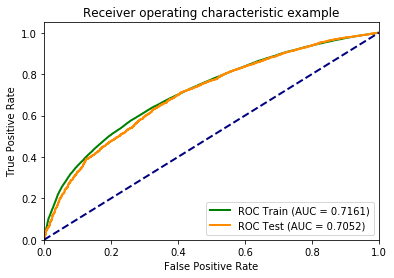

In [37]:
train_test_model(clf=clf_logreg, X_train=x_train_res, y_train=y_train_res, X_test=test_features, y_test=test_target)

In [28]:
# Combine get_performance_metrics and plot_roc_curve functions into one function
#def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
#    clf.fit(X_train, y_train)

    # Make prediction on the training data
#    y_train_pred = clf.predict(X_train)
#    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
#    y_test_pred = clf.predict(X_test)
#    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
#    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
#    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [29]:
# Helper method to print metric scores    
#def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    # names of metrics
#    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    
    # metrics of train
#    metric_values_train = [roc_auc_score(y_train, y_train_pred),
#                    accuracy_score(y_train, y_train_pred>threshold),
#                    precision_score(y_train, y_train_pred>threshold),
#                    recall_score(y_train, y_train_pred>threshold),
#                    f1_score(y_train, y_train_pred>threshold)
#                   ]
    
    # metrics of test
#    metric_values_test = [roc_auc_score(y_test, y_test_pred),
#                    accuracy_score(y_test, y_test_pred>threshold),
#                    precision_score(y_test, y_test_pred>threshold),
#                    recall_score(y_test, y_test_pred>threshold),
#                    f1_score(y_test, y_test_pred>threshold)
#                   ]
    
    # combine metrics from train and test
#    all_metrics = pd.DataFrame({'metrics':metric_names,
#                                'train':metric_values_train,
#                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
#    print(all_metrics)

In [30]:
# Function of plotting a roc curve
#def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
#    roc_auc_train = roc_auc_score(y_train, y_train_pred)
#    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

#    roc_auc_test = roc_auc_score(y_test, y_test_pred)
#    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
#    plt.figure()
#    lw = 2
#    plt.plot(fpr_train, tpr_train, color='green',
#             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
#    plt.plot(fpr_test, tpr_test, color='darkorange',
#             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
#    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#    plt.xlim([0.0, 1.0])
#    plt.ylim([0.0, 1.05])
#    plt.xlabel('False Positive Rate')
#    plt.ylabel('True Positive Rate')
#    plt.title('Receiver operating characteristic example')
#    plt.legend(loc="lower right")
#    plt.show()